<a href="https://colab.research.google.com/github/devlaurindo/projetos-data-science/blob/main/Projeto_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados do Titanic**

https://www.kaggle.com/c/titanic

# **Pacotes Necessários**

Quais foram as bibliotecas que serão necessarias para esse projeto. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importando a base de treino e de testes.**

In [2]:
dados1 = pd.read_csv('train.csv')
dados2 = pd.read_csv('test.csv')
resultado = pd.read_csv('gender_submission.csv')

Importando o dataset

**Iremos Contextualizar o problema**


*   O dataset é referente aos passageiros do Titanic
*   A principio o objetivo é tentar predizer quem iria sobreviver ou não. Logo é um problema de classificação.



In [3]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Com isso vemos que temos 891 pessoas no dados de treino e que há alguns dados faltando então iremos fazer alguns tratamentos neles.

In [6]:
dados1['Age'].fillna(dados1.Age.median(),inplace=True)
dados1['Embarked'].fillna(dados1.Embarked.mode()[0],inplace=True)
dados1['Fare'].fillna(dados1.Fare.median(),inplace=True)

Eu peguei a média da idade e da tariga para aqueles que estavam faltando

In [7]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Já nos dados de teste, nós temos 418 pessoas. Faremos o mesmo processo que o anterior.

In [8]:
dados2['Age'].fillna(dados1.Age.median(),inplace=True)
dados2['Embarked'].fillna(dados1.Embarked.mode()[0],inplace=True)
dados2['Fare'].fillna(dados1.Fare.median(),inplace=True)

No total temos 1309 pessoas, porém são 2224 pessoas que entraram no titanic, ou seja, sumiu alguns dados.

In [9]:
resultado.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Vo unir o PassengerId e Survived em dados2

In [10]:
dados2 = dados2[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
dados2 = pd.concat([resultado, dados2], axis = 1)

In [11]:
dados2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
dados = pd.concat([dados1, dados2], axis = 0, ignore_index=True)

Temos que colocar o "ignore_index = True", quando quisermos iniciar um nova indexação.

# **Visualização da base de dados**

In [13]:
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Contextualizando cada variável: 

_________________________________________



*   **Passenger Id**: É o Id do passageiro.
*   **Survived**: 1 Significa se o passageiro sobreviveu e o 0 significa que o passageiro morreu.
*   **Pcclass**: É a classe que o passageiro estava 1º, 2º ou 3º.
*   **Name**: É o nome do passageiro.
*   **Sex**: É o sexo do passageiro se é masculino ou feminino.
*   **Age**: É a idade do passageiro.
*   **SibSP**: Número de irmãos ou cônjuge no navio.
*   **Parch**: Número de pais ou filhos no navio.
*   **Ticket**: Número do ticket.
*   **Fare**: Tarifa paga.
*   **Cabin**: Número da cabine.
*   **Embarked**: Por onde ele embarcou.

Com isso vemos que alguns parâmetros estão na forma label encoding, isto é observe o parâmetro na 1º coluna. Ele pode assumir os valores 0,1 ou 2; porém isso pode criar um viés nos modelos ou criar uma performance aquém do esperado, portanto irei transforma-los para forma one-hot-enconding, ou seja, se os valores esperados do parâmetro são 0,1 e 2, eu irei criar 3 parâmetros, sendo a representação assim:

Bloco com recuo

1 0 0</br>
0 1 0</br>
0 0 1

Antes de fazermos qualquer tipo de tratamento, vamos refletir um pouco sobre a improtancia de algumas variáveis no nosso modelo, e fazer algumas suposições:

*   **Passenger ID**: O Id que uma máquina fornceceu para ele aleatoriamente é importante?
Eu creio que não então irei descartar essa variavel.
*   **Pcclass**: A classe deve impactar bastante, uma vez que pessoas da classe 1 devem ter tido preferência sobre a 2 e 3. E a 2 sobre a 3.
*   **Name**: Daria para analisar os prefixos de cada nome:Mr, Miss...
*   **Ticket**: Idem para o Passenger ID.
*   **Cabin**: Nesse modelo, a variável cabine será desconsiderada, visto que:



1.   Nada garante que ele estivesse no setor de sua cabine.
2.   Há uma ausência enorme de dados.










Text(0, 0.5, 'Número de Passageiros')

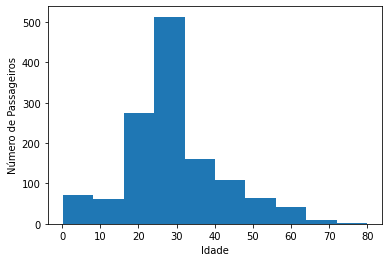

In [14]:
dados['Age'].plot(kind='hist')
plt.xlabel('Idade')
plt.ylabel('Número de Passageiros')

Vemos que grande parte dos passageiros era jovens.

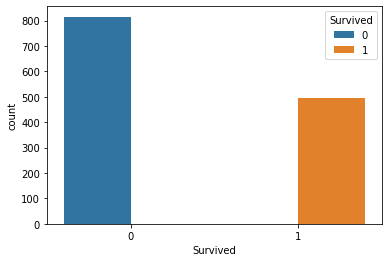

In [15]:
sns.countplot(x='Survived', data=dados,hue='Survived');

Nessa amostra de dados não está equilibrada, podendo criar um viés no modelo, visto que mais gente não sobreviveu do que sobreviveu. Nesse sentido, o modelo pode acabar falhando mais predizendo que uma pessoa que sobreviveu não sobreviva.

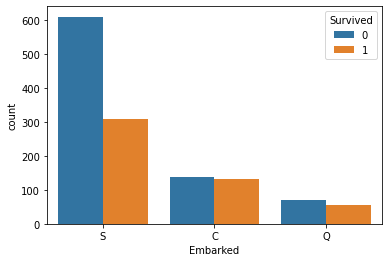

In [17]:
sns.countplot(x = 'Embarked', data = dados, hue = 'Survived');

Com essa amostra vemos que a proporção de pessoas que morreram enbarcando em S é desbalanceada quando vemos as pessoas que embarcaram em C e Q

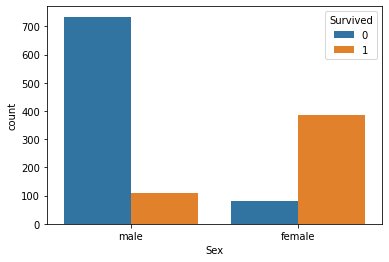

In [18]:
sns.countplot(x = 'Sex', data = dados, hue = 'Survived')

Vemos que a preferência foi dado as mulheres.</br>
Para ver a correlação dos dados de maneira mais objetiva, irei transformar as variaveis categoricas primeiramente para formar label encoding. Para isso irei importar essa função.




In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder = LabelEncoder()

In [21]:
v1 = label_encoder.fit_transform(dados['Sex'])
v2 = label_encoder.fit_transform(dados['Embarked'])

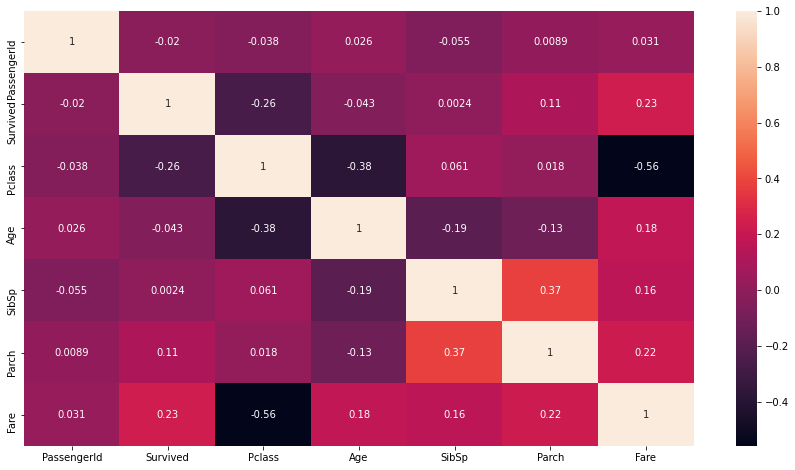

In [23]:
plt.subplots(figsize=(15,8))
sns.heatmap(dados.corr(), annot = True);

Com essa amostra, vemos aqui que o PassengerId tem uma correlação quase nula com a sobrevivência das pessoas, enquanto que o Sexo, a Classe, o Embarque e a tarifa possuem correlações consideráveis.</br></br>

Assim, as variáveis que irei manter são: Pclass, Fare, Sex, Embarked, Parch, Age, SibSp

In [24]:
dados = dados[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]

# **Tratamento das bases de dados**

In [25]:
dados.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,3,22.0,1,0,7.2500,male,S
1,1,1,38.0,1,0,71.2833,female,C
2,1,3,26.0,0,0,7.9250,female,S
3,1,1,35.0,1,0,53.1000,female,S
4,0,3,35.0,0,0,8.0500,male,S


Para pode evitar possiveis viés do label encoding, irei transformar o Pclass, SibSp, Parch, Sex e Embarked em one hot encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [29]:
one = dados [['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']]
q = one_hot_encoder.fit_transform(one).toarray()

In [30]:
q = pd.DataFrame(q)

In [31]:
n = dados[['Fare', 'Age', 'Survived']]

In [32]:
dados = pd.concat([q, n], axis = 1)

In [33]:
dados.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,Fare,Age,Survived
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7.2500,22.0,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,71.2833,38.0,1
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.9250,26.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,53.1000,35.0,1
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,8.0500,35.0,0


In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [35]:
colun = ['Age', 'Fare']

In [36]:
dados[colun] = sc.fit_transform(dados[colun])

In [37]:
dados.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,Fare,Age,Survived
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.503291,-0.581628,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.734744,0.658652,1
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.490240,-0.271558,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.383183,0.426099,1
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.487824,0.426099,0


# **Divisão Base de treinamento X Base de teste**

Aqui nós separamos novamente o dados de treino e teste.

In [38]:
dados1, dados2 = dados[0:891], dados[891:1309]

In [39]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         891 non-null    float64
 1   1         891 non-null    float64
 2   2         891 non-null    float64
 3   3         891 non-null    float64
 4   4         891 non-null    float64
 5   5         891 non-null    float64
 6   6         891 non-null    float64
 7   7         891 non-null    float64
 8   8         891 non-null    float64
 9   9         891 non-null    float64
 10  10        891 non-null    float64
 11  11        891 non-null    float64
 12  12        891 non-null    float64
 13  13        891 non-null    float64
 14  14        891 non-null    float64
 15  15        891 non-null    float64
 16  16        891 non-null    float64
 17  17        891 non-null    float64
 18  18        891 non-null    float64
 19  19        891 non-null    float64
 20  20        891 non-null    float6

In [40]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         418 non-null    float64
 1   1         418 non-null    float64
 2   2         418 non-null    float64
 3   3         418 non-null    float64
 4   4         418 non-null    float64
 5   5         418 non-null    float64
 6   6         418 non-null    float64
 7   7         418 non-null    float64
 8   8         418 non-null    float64
 9   9         418 non-null    float64
 10  10        418 non-null    float64
 11  11        418 non-null    float64
 12  12        418 non-null    float64
 13  13        418 non-null    float64
 14  14        418 non-null    float64
 15  15        418 non-null    float64
 16  16        418 non-null    float64
 17  17        418 non-null    float64
 18  18        418 non-null    float64
 19  19        418 non-null    float64
 20  20        418 non-null    flo

In [41]:
x_train = dados1.iloc[:, :-1].values
y_train = dados1.iloc[:, -1:].values

In [42]:
x_test = dados2.iloc[:, :-1].values
y_test = dados2.iloc[:, -1:].values

# **Construção e treinamento do modelo: Árvore de decisão**

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(100, 2101, 25), 'min_samples_leaf' : [2, 5, 10, 10], 'min_samples_split' : [2, 3, 4, 5, 6]}
model = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2 ..........
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, score=0.760, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2 ..........
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2 ..........
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, score=0.815, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2 ..........
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, score=0.770, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2 ..........
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, score=0.809, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=3 ..........
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=3, sc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


A saída de streaming foi truncada nas últimas 5000 linhas.
[CV] max_depth=1500, min_samples_leaf=2, min_samples_split=2 .........
[CV]  max_depth=1500, min_samples_leaf=2, min_samples_split=2, score=0.771, total=   0.0s
[CV] max_depth=1500, min_samples_leaf=2, min_samples_split=2 .........
[CV]  max_depth=1500, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] max_depth=1500, min_samples_leaf=2, min_samples_split=2 .........
[CV]  max_depth=1500, min_samples_leaf=2, min_samples_split=2, score=0.809, total=   0.0s
[CV] max_depth=1500, min_samples_leaf=2, min_samples_split=2 .........
[CV]  max_depth=1500, min_samples_leaf=2, min_samples_split=2, score=0.775, total=   0.0s
[CV] max_depth=1500, min_samples_leaf=2, min_samples_split=2 .........
[CV]  max_depth=1500, min_samples_leaf=2, min_samples_split=2, score=0.820, total=   0.0s
[CV] max_depth=1500, min_samples_leaf=2, min_samples_split=3 .........
[CV]  max_depth=1500, min_samples_leaf=2, min_samples_split=3, sc

[Parallel(n_jobs=1)]: Done 8100 out of 8100 | elapsed:   40.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(100, 2101, 25),
               

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
tree_pred_train = model.predict(x_train)
tree_pred_train[0:10]

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1])

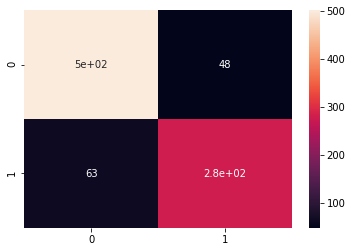

In [46]:
tree_pred_train = model.predict(x_train)
k = confusion_matrix(y_train,tree_pred_train)
sns.heatmap(k, annot = True);

Explicando a matriz 2 x 2:

*   **Canto superior esquerdo**: Verdadeiro Positivo (A pessoa não sobreviveu)
*   **Canto superior direito**: Falso Positivo (A pessoa não sobreviveu, mas o modelo diz o contrário)
*   **Canto inferior esquerdo**: Falso negativo (A pessoa sobreviveu, mas o modelo diz o contrário)
*   **Canto inferior direito**: Verdadeiro Negativo (A pessoa sobreviveu)

Como nos temiamos, já no treino o modelo errou mais percentualmente predizemos que pessoas que sobreviveram não iriam sobreviver

In [47]:
print(classification_report(y_train, tree_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       549
           1       0.85      0.82      0.83       342

    accuracy                           0.88       891
   macro avg       0.87      0.86      0.87       891
weighted avg       0.87      0.88      0.87       891



# **Avaliação do modelo**

Primeiramente vamos arrumar a base de dados do treino

In [48]:
x_test[0]

array([ 0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        , -0.49209268,  0.38734064])

In [49]:
y_test[0]

array([0])

Fiz todo o procedimento que fizemos, para os inputs ficarem iguais.

In [50]:
pred = model.predict(x_test)

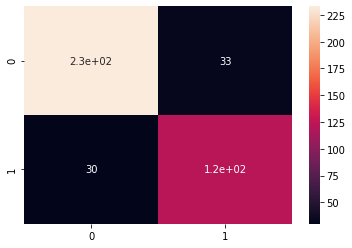

In [51]:
tree_pred_test = model.predict(x_test)
m = confusion_matrix(y_test, tree_pred_test)
sns.heatmap(m, annot = True)

In [52]:
print(classification_report(y_test, tree_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       266
           1       0.79      0.80      0.79       152

    accuracy                           0.85       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.85      0.85      0.85       418



Nesse ponto aqui, pessoas poderiam achar que o modelo está oferecendo mais falso positivo do que falso negativo.</br>
Contudo, imagina que você tivesse 1000 positivos e 2 negativos. Se a sua quantidade de falso positivo fosse 300 e a quantidade de falso negativo fosse 1, você poderia dizer que o falso positivo é maior?</br>
Quando olhamos eficiência, é mais adequado olhar a relativa do que a absoluta. Nesse aspecto, vemos que o erro de falso negativo supera o falso positivo.

# **Vamos analisar o desempenho de uma rede neural**

In [54]:
import tensorflow as tf
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 8, activation='relu', input_shape=(25,)))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [56]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 208       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [57]:
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [58]:
epochs_hist = classifier.fit(x_train, y_train, epochs = 200, batch_size = 15)

Epoch 1/200
60/60 [==============================] - 1s 1ms/step - loss: 0.7089 - accuracy: 0.5701
Epoch 2/200
60/60 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.6543
Epoch 3/200
60/60 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.6869
Epoch 4/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.7363
Epoch 5/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7553
Epoch 6/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.7868
Epoch 7/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.8002
Epoch 8/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.8036
Epoch 9/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.8092
Epoch 10/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.8070
Epoch 11/

In [59]:
mlp_pred_train = classifier.predict(x_train)
mlp_pred_train[0:10]

array([[0.16188389],
       [0.9698654 ],
       [0.39988804],
       [0.9654608 ],
       [0.09125578],
       [0.06966254],
       [0.3102082 ],
       [0.03489122],
       [0.5776087 ],
       [0.9632074 ]], dtype=float32)

In [60]:
mlp_pred_train = (mlp_pred_train > 0.5)
mlp_pred_train [0:10]

array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True]])

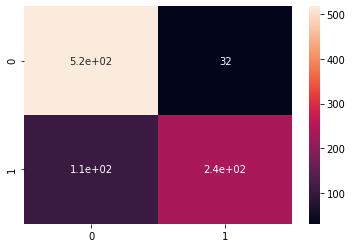

In [61]:
cm = confusion_matrix(y_train, mlp_pred_train)
sns.heatmap(cm, annot = True)

In [62]:
print(classification_report(y_train, mlp_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       549
           1       0.88      0.69      0.77       342

    accuracy                           0.85       891
   macro avg       0.86      0.82      0.83       891
weighted avg       0.85      0.85      0.84       891



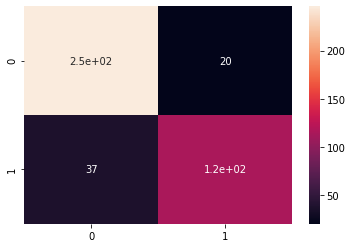

In [63]:
mlp_pred_test = classifier.predict(x_test)
mlp_pred_test = (mlp_pred_test > 0.5)
Neural = confusion_matrix(y_test, mlp_pred_test)
sns.heatmap(Neural, annot = True)

In [64]:
print(classification_report(y_test, mlp_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       266
           1       0.85      0.76      0.80       152

    accuracy                           0.86       418
   macro avg       0.86      0.84      0.85       418
weighted avg       0.86      0.86      0.86       418

